In [1]:
# load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [3]:
# show the first 4 rows of dataset

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### For the 'Median value of owner-occupied homes' provide a boxplot

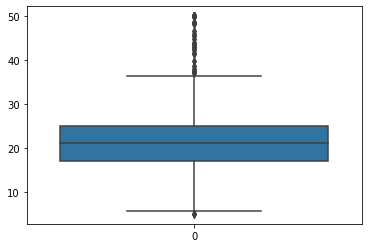

In [4]:
sns.boxplot(data=boston_df['MEDV'])
plt.show()

The median is slightly higher than 20.

### Provide a bar plot for the Charles river variable

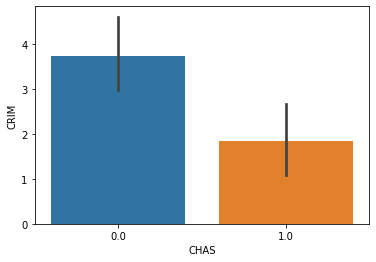

In [5]:
sns.barplot(x='CHAS', y='CRIM', data=boston_df)
plt.show()

If tract does not bounds river, the per capita crime rate is much higher.

### Provide a boxplot for the MEDV variable vs the AGE variable.

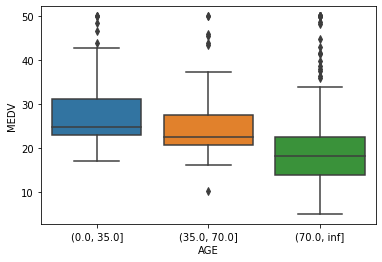

In [6]:
age_groups = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.infty])
sns.boxplot(x=age_groups, y=boston_df['MEDV'])
plt.show()

The youngest group has highest median of MEDV.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

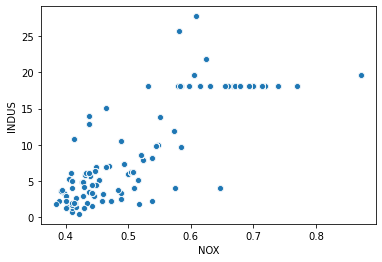

In [7]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.show()

It shows that they are positively correlated.

### Create a histogram for the pupil to teacher ratio variable

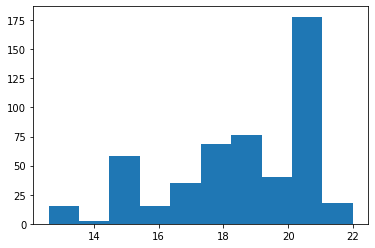

In [8]:
plt.hist(boston_df['PTRATIO'])
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not?

H_0: There is no significant difference in median value of houses bounded by the Charles river.

H_1: There is significant difference in median value of houses bounded by the Charles river under 5% sig level.

In [9]:
MEDV_0 = boston_df[boston_df['CHAS']==0]['MEDV']
MEDV_1 = boston_df[boston_df['CHAS']==1]['MEDV']

In [10]:
avg_0 = MEDV_0.mean()
avg_1 = MEDV_1.mean()
std_1 = MEDV_1.std()

In [11]:
# get p-value
from scipy.stats import norm

2*norm.cdf((avg_0-avg_1)/(std_1/np.sqrt(MEDV_0.count())))<0.05

True

Conclusion: Because the p-value is smaller than 0.05, we reject the null hypothesis.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H_0: There is no difference in Median values of houses for each proportion of onwer occupied units built prior to 1940.

H_1: There is difference in Median values of houses for each proportion of onwer occupied units built prior to 1940.

In [12]:
import scipy
scipy.stats.levene(boston_df[boston_df['AGE'] < 35]['MEDV'],
                  pd.concat([boston_df[boston_df['AGE'] >= 35], boston_df[boston_df['AGE'] <= 70]], axis=0)['MEDV'],
                  boston_df[boston_df['AGE'] > 70]['MEDV'],
                  center='mean')

LeveneResult(statistic=0.5498646379174595, pvalue=0.5772007219866153)

In [13]:
age_1 = boston_df[boston_df['AGE'] < 35]['MEDV']
age_2 = pd.concat([boston_df[boston_df['AGE'] >= 35], boston_df[boston_df['AGE'] <= 70]], axis=0)['MEDV']
age_3 = boston_df[boston_df['AGE'] > 70]['MEDV']

In [14]:
f_stat, p_value = scipy.stats.f_oneway(age_1, age_2, age_3)

In [15]:
f_stat, p_value

(30.072293504374617, 2.0616200557263374e-13)

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis.

### Can we conclude that there is no relationship between Nitric oxide concenteations and proportion of non-retail business acres per town?

In [16]:
pd.concat([boston_df['NOX'], boston_df['INDUS']], axis=1).corr()

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


We cannot conclude that there is no relationship between the two variables as the corr is more than 75%.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [17]:
import statsmodels.api as sm

X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

/Users/cenghui/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/cenghui/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/cenghui/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        00:12:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: the one more dditional weighted distance to the five Boston employment centres, the 1.1 higer median value of owner occupied homes.